# Optimizaten problem
We need to enclose a rectangular field with a fence. We have 500 feet of fencing material and a building is on one side of the field and so won’t need any fencing. Determine the dimensions of the field that will enclose the largest area.

## 1. Mathematic equations

The constrains of the perimeter is $$500=l*2w$$ where $l$ is the lengh and $w$ is the width of the rectangular field.

Furthermore we know that the area of a rectangle is $$A=l*w$$

First we solve the constrains for $l$, which gives us: $$l=500-2w$$
By substituting $l$ into the area function we get: $$A(w)=(500-2w)*w=500w-2w^2$$

To find the largest area of the field we need to know when the derivative of function $A(w)$  is zero because it will be the maximum of the function.
The derivitive is $$A'(w)=500-4w$$ 
Setting this equal to zero and solving for w we will get: $$0=500-4w \Rightarrow 4w=500\Rightarrow w=125$$


Now we know the width which we can use to find the length by first finding the max area $A=500*125-2*125^2=31250ft^2$

Solving for $l$ in the original area function we get
$l=\frac{A}{w}=\frac{31250}{125}=250$

The largest area of the rectangular field is when $l=250ft$ and $w=125ft$


In [0]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

### 1.1 Graph that shows the maximum area of field dependent of the width

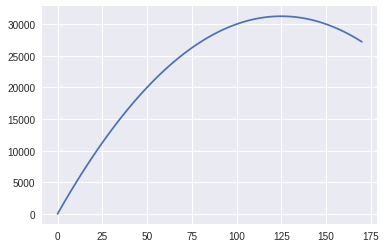

In [168]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
x=np.linspace(0, 170, num=100)
y=np.linspace(-20.0, 10.0, num=100)
y=500*x-2*x**2

plt.plot(x,y)
plt.show()

## 2. One variable method
### 2.1 Tensorflow gradient descent

In [0]:
def y(x):
  return 100000000-(500*x-2*x**2)

In [177]:
x = tf.Variable(tf.random_uniform([1], -200, 150))

# Uncomment the parmeter x
print(x)

<tf.Variable 'Variable_21:0' shape=(1,) dtype=float32_ref>


In [178]:
# 1.4 Build training graph.
loss = y(x)  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.000001)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
print(init)

loss: Tensor("sub_30:0", shape=(1,), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fcf2f333208>
train: name: "GradientDescent_23"
op: "NoOp"
input: "^GradientDescent_23/update_Variable_21/ApplyGradientDescent"

name: "init_23"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"
input: "^Variable_2/Assign"
input: "^Variable_3/Assign"
input: "^Variable_4/Assign"
input: "^Variable_5/Assign"
input: "^Variable_6/Assign"
input: "^Variable_7/Assign"
input: "^Variable_8/Assign"
input: "^Variable_9/Assign"
input: "^Variable_10/Assign"
input: "^Variable_11/Assign"
input: "^Variable_12/Assign"
input: "^Variable_13/Assign"
input: "^Variable_14/Assign"
input: "^Variable_15/Assign"
input: "^Variable_16/Assign"
input: "^Variable_17/Assign"
input: "^Variable_18/Assign"
input: "^Variable_19/Assign"
input: "^Variable_20/Assign"
input: "^Variable_21/Assign"



In [189]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
# y_initial_values = sess.run(y)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([x]))

[array([128.4609], dtype=float32)]


In [190]:
# 1.7 Perform training.
for step in range(100):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    # if step % 20 == 0

print(sess.run([x]))

[array([128.45938], dtype=float32)]


So I don't get the result I'm looking for which is $x=125$. I'm not sure why that that is, but I think it might have something to do that gradiant descent calculates minimas and not maximas which is what I am looking for.

### 2.2 Genetic algorithm

In [193]:
import numpy as np

import multiprocessing
from collections import OrderedDict
import os
import time


def eval_iter(arg_lst, l_lst):
    for c_i, args in enumerate(arg_lst):
        yield c_i, args, l_lst


def eval_func(c_i, args, l_lst):
    assert len(args) == 3
    x = args[0]
    y = args[1]
    z = args[2]
    res = 100000000-(500*x-2*x**2)+z+y
    print(f"Eval {x}, {y}, {z}: {res}")
    l_lst[c_i] = res


if __name__ == '__main__':

    generation_num = 100
    child_num = 50

    space = OrderedDict((
        ('x', (0., 150.)),
        ('y', (0., 0.)),
        ('z', (0., 0.))
    ))

    params = OrderedDict([(nm, []) for nm in space.keys()])
    for nm, v_range in space.items():
        params[nm] = np.random.uniform(v_range[0], v_range[1], size=child_num)

    arg_list = []
    for c_n in range(child_num):
        arg_list.append([val[c_n] for val in params.values()])

    manager = multiprocessing.Manager()
    loss_lst = manager.list([np.inf for i in range(child_num)])

    for r_n in range(generation_num):
        with multiprocessing.Pool(os.cpu_count()) as pool:
            pool.starmap(eval_func, eval_iter(arg_list, loss_lst))

        fittest_idx = int(np.argmin(loss_lst))
        base_args = arg_list[fittest_idx]
        print(f"Best {base_args}\n")

        # mutate offspring from fittest individual
        params = OrderedDict([(nm, []) for nm in space.keys()])
        for s_i, (nm, v_range) in enumerate(space.items()):
            std = (v_range[1] - v_range[0]) / 2
            noise = np.random.normal(0, std, size=child_num)
            new_param = base_args[s_i] + noise
            params[nm] = np.clip(new_param, v_range[0], v_range[1])

        arg_list = []
        for c_n in range(child_num):
            arg_list.append([val[c_n] for val in params.values()])

        loss_lst = manager.list([np.inf for i in range(child_num)])

Eval 128.6955478306625, 0.0, 0.0: 99968777.31414753
Eval 43.02368203100042, 0.0, 0.0: 99982190.23341551
Eval 1.3177468901700462, 0.0, 0.0: 99999344.59946865
Eval 1.9165238947652152, 0.0, 0.0: 99999049.0841803
Eval 90.08133468067986, 0.0, 0.0: 99971188.62637536
Eval 128.01442222300162, 0.0, 0.0: 99968768.17348267
Eval 38.970509510845304, 0.0, 0.0: 99983552.14646764
Eval 22.671883653884056, 0.0, 0.0: 99989692.08678989
Eval 54.25234757318014, 0.0, 0.0: 99978760.4606478
Eval 131.13766191761005, 0.0, 0.0: 99968825.34178764
Eval 78.76692657174932, 0.0, 0.0: 99973024.99415724
Eval 2.2425503512531364, 0.0, 0.0: 99998888.78288853
Eval 106.784998508167, 0.0, 0.0: 99969413.5725587
Eval 76.6620916925945, 0.0, 0.0: 99973423.10675907
Eval 95.64001800083311, 0.0, 0.0: 99970474.01708598
Eval 62.18710683847563, 0.0, 0.0: 99976640.91909464
Eval 18.53000909038845, 0.0, 0.0: 99991421.71792859
Eval 130.5385992019563, 0.0, 0.0: 99968811.35216224
Eval 93.02525116045389, 0.0, 0.0: 99970794.7691267
Eval 22.594

My best result in the genetic algorithm is 123.09. 